# SEECS Parking Simulation Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Loading Data from file

In [21]:
# read text file into pandas DataFrame
df = pd.read_csv("ParkingDataDataset.txt", sep="\t")
df

,DateTime,Car ID,Vehicle,VType,Day,ReqT,EntHr,EntMin,ExitHr,ExitMin,...,Tries,DFS,IdleVeh,tFree,z1Free,z2Free,z3Free,z4Free,dReq,Unnamed: 27
0,2022-01-01 08:25:00,936,Student,3,1,406,8,25,8,32,...,1,365,5,93,14,49,8,22,1,NaN
1,2022-01-01 08:25:00,937,Faculty,2,1,1333,8,25,8,47,...,1,354,6,93,14,49,8,22,1,NaN
2,2022-01-01 08:00:00,942,Staff,5,1,8883,8,0,8,0,...,2,672,17,0,0,0,0,0,1,NaN
3,2022-01-01 08:39:00,948,Visitor,1,1,1143,8,39,8,58,...,1,365,12,88,12,46,8,22,1,NaN
4,2022-01-01 08:00:00,983,Student,3,1,7432,8,0,8,0,...,2,672,15,0,0,0,0,0,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161,2022-01-07 08:00:00,1184,Staff,5,7,13092,8,0,8,0,...,1,672,0,0,0,0,0,0,0,NaN
2162,2022-01-07 08:00:00,1185,Student,3,7,14373,8,0,8,0,...,1,672,0,0,0,0,0,0,0,NaN
2163,2022-01-07 08:00:00,1186,Staff,5,7,5785,8,0,8,0,...,1,672,0,0,0,0,0,0,0,NaN
2164,2022-01-07 08:00:00,1187,Student,3,7,14083,8,0,8,0,...,1,672,0,0,0,0,0,0,0,NaN


## Data Preparation and Cleaning

- Loading the file using pandas

- Fix any missing or incorrect values

In [22]:
cleaned_df = df.copy()
cleaned_df.drop('Car ID', inplace=True, axis=1)
cleaned_df.drop('Unnamed: 27', inplace=True, axis=1)

cleaned_df.drop(cleaned_df[cleaned_df['TBill'] == 0].index, inplace = True)
cleaned_df.head(5)

,DateTime,Vehicle,VType,Day,ReqT,EntHr,EntMin,ExitHr,ExitMin,TDelay,...,nFill,Tries,DFS,IdleVeh,tFree,z1Free,z2Free,z3Free,z4Free,dReq
0,2022-01-01 08:25:00,Student,3,1,406,8,25,8,32,406,...,2,1,365,5,93,14,49,8,22,1
1,2022-01-01 08:25:00,Faculty,2,1,1333,8,25,8,47,1333,...,1,1,354,6,93,14,49,8,22,1
3,2022-01-01 08:39:00,Visitor,1,1,1143,8,39,8,58,1143,...,4,1,365,12,88,12,46,8,22,1
5,2022-01-01 08:55:00,Faculty,2,1,731,8,55,9,8,731,...,3,1,354,17,74,3,41,8,22,2
7,2022-01-01 09:21:00,Student,3,1,95,9,21,9,22,95,...,12,1,365,16,60,1,29,8,22,3


## Statistical Analysis

In [23]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = cleaned_df.select_dtypes(include=numerics)

numeric_df


,VType,Day,ReqT,EntHr,EntMin,ExitHr,ExitMin,TDelay,IdleT,TBill,...,nFill,Tries,DFS,IdleVeh,tFree,z1Free,z2Free,z3Free,z4Free,dReq
0,3,1,406,8,25,8,32,406,1510,8,...,2,1,365,5,93,14,49,8,22,1
1,2,1,1333,8,25,8,47,1333,1498,39,...,1,1,354,6,93,14,49,8,22,1
3,1,1,1143,8,39,8,58,1143,2359,48,...,4,1,365,12,88,12,46,8,22,1
5,2,1,731,8,55,9,8,731,3321,21,...,3,1,354,17,74,3,41,8,22,2
7,3,1,95,9,21,9,22,95,4845,2,...,12,1,365,16,60,1,29,8,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,1,7,10564,16,42,19,38,10564,31297,440,...,5,1,365,1,76,8,39,7,22,19
2133,3,7,12829,16,23,19,57,12829,30169,241,...,9,1,365,5,76,9,38,7,22,0
2136,2,7,7774,17,49,19,58,7774,35327,227,...,6,1,365,5,73,5,39,7,22,0
2143,2,7,4047,18,42,19,50,4047,38541,118,...,9,1,365,2,69,4,36,7,22,0


## Plotting histogram for idle vehicle during one day

In [24]:
# Sorting the data
numeric_df = numeric_df.sort_values(['EntHr', 'EntMin'], ascending=[True, True])
numeric_df

,VType,Day,ReqT,EntHr,EntMin,ExitHr,ExitMin,TDelay,IdleT,TBill,...,nFill,Tries,DFS,IdleVeh,tFree,z1Free,z2Free,z3Free,z4Free,dReq
38,2,1,8066,8,15,10,30,8066,920,235,...,1,1,365,5,98,16,52,8,22,8
388,3,2,10107,8,15,11,4,10107,917,190,...,1,1,365,6,98,16,52,8,22,11
1361,5,5,1427,8,15,8,38,1427,878,18,...,1,1,365,5,98,16,52,8,22,0
1033,1,4,2266,8,16,8,54,2266,975,94,...,1,1,365,3,98,16,52,8,22,1
368,2,2,6686,8,18,10,10,6686,1098,195,...,1,1,354,7,96,14,52,8,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,3,3,545,19,39,19,48,545,41964,10,...,8,1,365,6,64,2,33,7,22,0
2156,3,7,978,19,39,19,55,978,41917,18,...,7,1,365,3,75,6,39,8,22,0
342,1,1,1155,19,40,19,59,1155,41977,48,...,6,1,365,1,70,6,36,6,22,0
1342,3,4,732,19,42,19,54,732,42125,14,...,9,1,365,1,61,4,29,7,21,0


In [25]:
hours = sorted(list(df['EntHr'].unique()))  # separating unique hours
sum_of_idleVehicles = list(np.zeros(len(hours)))  # creating an empty array for storing sum of idle vehicles in each hour

for hour in range(len(hours)):
    sum_of_idleVehicles[hour] = numeric_df[numeric_df['EntHr'] == hours[hour]]['IdleVeh'].sum()
    
print(hours)

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


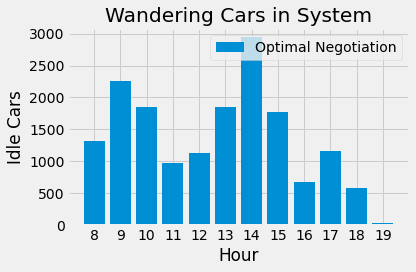

In [26]:
# plotting histogram for idle vehicle count per each hour
plt.style.use("fivethirtyeight")

plt.bar(hours, sum_of_idleVehicles, label='Optimal Negotiation')

plt.legend()
plt.xticks(ticks=hours)
plt.xlabel("Hour")
plt.ylabel("Idle Cars")
plt.title("Wandering Cars in System")
plt.tight_layout()
plt.show()

In [27]:
hours = sorted(list(df['EntHr'].unique()))  # separating unique hours
sum_of_profits = list(np.zeros(len(hours)))  # creating an empty array for storing sum of idle vehicles in each hour

for hour in range(len(hours)):
    sum_of_profits[hour] = numeric_df[numeric_df['EntHr'] == hours[hour]]['TBill'].sum()
    
print(hours)
print(sum_of_profits)

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[28697, 37016, 28495, 25517, 26155, 28930, 34845, 28311, 18175, 12239, 4637, 382]


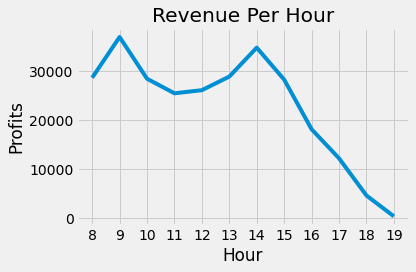

In [28]:
plt.style.use("fivethirtyeight")

plt.plot(hours, sum_of_profits)  #for plotting the graph

plt.xlabel("Hour")
plt.ylabel("Profits")
plt.title("Revenue Per Hour")
plt.xticks(ticks=hours)
plt.tight_layout()
plt.show()